# ASTR 403 One dimensional gravity simulations

Code to generate and store final data set to be analyzed

In [2]:
%pylab inline
import wendy as wd
import tqdm

%config InlineBackend.figure_format = 'retina'
import seaborn as sb
sb.set_context('poster')
sb.set_style('white') 
sb.set_style('ticks')

Populating the interactive namespace from numpy and matplotlib


In [14]:
N = 1001
v0 = 0.001
tf = 1000
nt = 10000
t = linspace(0, tf, nt)
dt = tf / nt

m = ones(N) / N
x = linspace(-pi/2, pi/2, N)

nsims = 10
epsilon = 1e-6

In [42]:
def sim(x, v, m, tf, nt):
    N = len(x)
    dt = tf / nt

    g = wd.nbody(x, v, m, dt, maxcoll=10000000000)

    xt = np.empty((N, nt))
    vt = np.empty((N, nt))
    Pt = np.empty(nt)
    Kt = np.empty(nt)

    E0 = wd.energy(x, v, m)

    for ii in tqdm.trange(nt):
        xt[:, ii] = x
        vt[:, ii] = v
        Kt[ii] = wd.energy(x, v, m, energy_type=wd.EnergyType.KINETIC)
        Pt[ii] = wd.energy(x, v, m, energy_type=wd.EnergyType.POTENTIAL)
        if np.abs((Kt[ii] + Pt[ii]) / E0 - 1) > 0.01:
            raise RuntimeError('Energy diverging')
        x, v = next(g)

    return xt, vt, Kt, Pt

def plot_ic(x, v):
    figure(figsize=[3, 3])
    scatter(x, v, c=np.abs(x), s=3, edgecolors='None', cmap='jet')
    ylim([-0.005, 0.005])
    title('Initial conditions')
    xlabel('x')
    ylabel('v')
    
def plot_ics(v_arr, w):        
    fig = plt.figure(figsize=(16, 4)) # Notice the equal aspect ratio
    
    for ii in range(4):
        ax = subplot(1, 4, ii+1)
        scatter(x, v_arr[ii], c=np.fabs(x),s=7.,edgecolors='None', cmap='jet')
        xlim(-pi/2,pi/2)
        ylim(-0.005, 0.005)
        #ylabel('v')
        if ii == 0:
            var=0
            #ylabel('v (velocity)', size=32)    
        else:
            ax.set_yticks([])
        #ax.set_aspect('equal')
        #xlabel('x (length)', size=32)
        if ii != 3:
            annotate(r'$\omega={:d}$'.format(w[ii]),(0.95,0.95),xycoords='axes fraction',
                 horizontalalignment='right',verticalalignment='top',size=20.)
        else:
            annotate(r'$v = v_0\ Normal(0, 1)$',(0.95,0.95),xycoords='axes fraction',
                 horizontalalignment='right',verticalalignment='top',size=20.)

    fig.subplots_adjust(wspace=0.03, hspace=0)

## Initial condition A (w = 1)

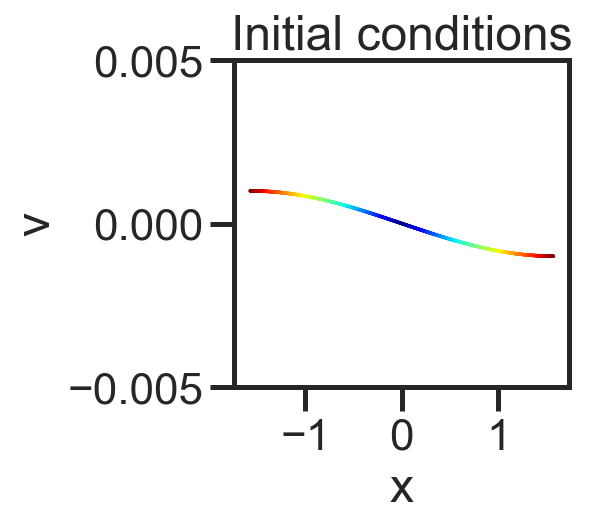

In [10]:
v1 = -v0 * np.sin(x) + v0*epsilon*np.random.normal(size=N)
plot_ic(x, v1)

In [5]:
for ii in range(nsims):
    v = -v0 * np.sin(x) + v0*epsilon*np.random.normal(size=N)
    xt, vt, Kt, Pt = sim(x, v, m, tf, nt)
    np.save('./dataA/xt_A' + str(ii+1), xt)
    np.save('./dataA/vt_A' + str(ii+1), vt)
    np.save('./dataA/Kt_A' + str(ii+1), Kt)
    np.save('./dataA/Pt_A' + str(ii+1), Pt)

100%|██████████| 10000/10000 [03:00<00:00, 58.12it/s]


## Initial condition B (w=49)

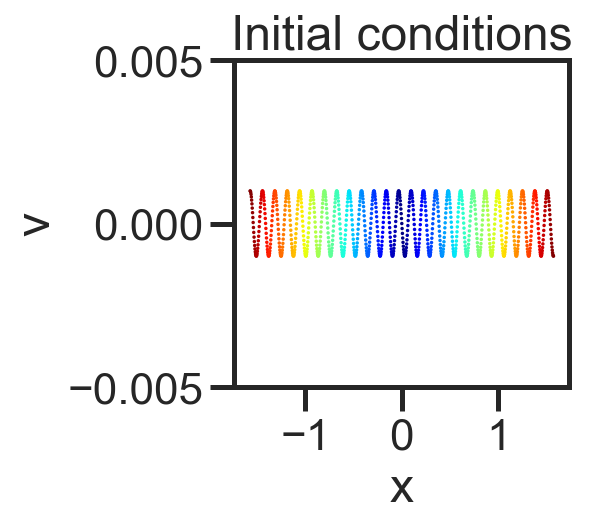

In [11]:
w = 49
v49 = -v0 * np.sin(w*x) + v0*epsilon*np.random.normal(size=N)
plot_ic(x, v49)

In [7]:
w = 49
for ii in range(nsims):
    v = -v0 * np.sin(w*x) + v0*epsilon*np.random.normal(size=N)
    xt, vt, Kt, Pt = sim(x, v, m, tf, nt)
    np.save('./dataB/xt_B' + str(ii+1), xt)
    np.save('./dataB/vt_B' + str(ii+1), vt)
    np.save('./dataB/Kt_B' + str(ii+1), Kt)
    np.save('./dataB/Pt_B' + str(ii+1), Pt)

100%|██████████| 10000/10000 [02:53<00:00, 57.56it/s]


## Initial Condition C (w = 97)

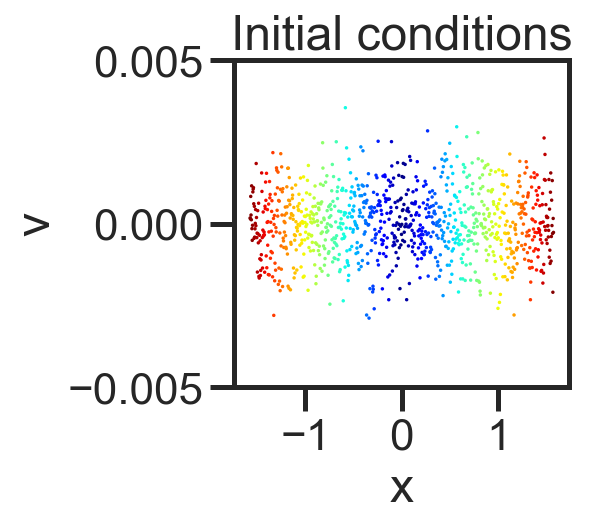

In [12]:
w = 97
v97 = -v0 * np.sin(w*x) + v0*epsilon*np.random.normal(size=N)
plot_ic(x, v)

In [9]:
w = 97
for ii in range(nsims):
    v = -v0 * np.sin(w*x) + v0*epsilon*np.random.normal(size=N)
    xt, vt, Kt, Pt = sim(x, v, m, tf, nt)
    np.save('./dataC/xt_C' + str(ii+1), xt)
    np.save('./dataC/vt_C' + str(ii+1), vt)
    np.save('./dataC/Kt_C' + str(ii+1), Kt)
    np.save('./dataC/Pt_C' + str(ii+1), Pt)

100%|██████████| 10000/10000 [02:55<00:00, 56.90it/s]


## Initial condition D (gaussian v0)

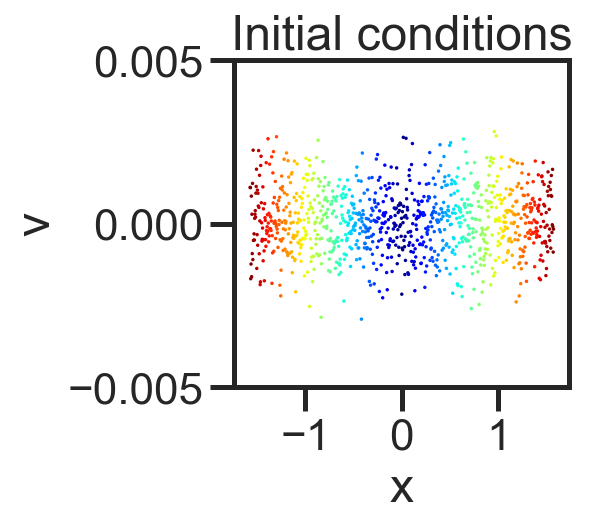

In [13]:
vr = v0*np.random.normal(size=N)
plot_ic(x, vr)

In [11]:
for ii in range(nsims):
    v = v0*np.random.normal(size=N)
    xt, vt, Kt, Pt = sim(x, v, m, tf, nt)
    np.save('./dataD/xt_D' + str(ii+1), xt)
    np.save('./dataD/vt_D' + str(ii+1), vt)
    np.save('./dataD/Kt_D' + str(ii+1), Kt)
    np.save('./dataD/Pt_D' + str(ii+1), Pt)

100%|██████████| 10000/10000 [02:52<00:00, 58.03it/s]


## Initial Condition E (gaussian 10 * v0)

(-0.05, 0.05)

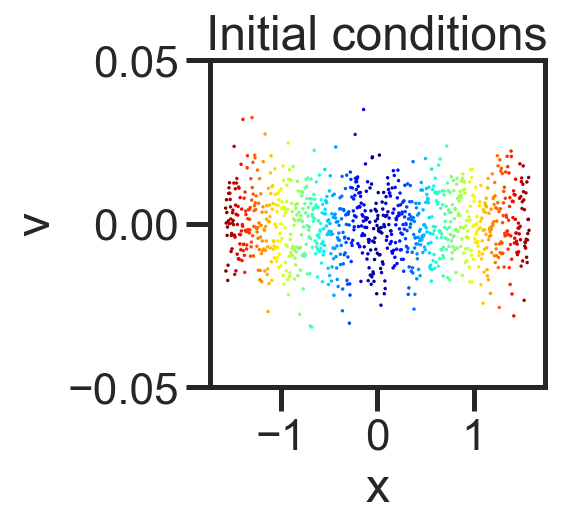

In [16]:
v = 10*v0*np.random.normal(size=N)
plot_ic(x, v)
ylim([-0.05, 0.05])

In [13]:
for ii in range(nsims):
    v = 10*v0*np.random.normal(size=N)
    xt, vt, Kt, Pt = sim(x, v, m, tf, nt)
    np.save('./dataE/xt_E' + str(ii+1), xt)
    np.save('./dataE/vt_E' + str(ii+1), vt)
    np.save('./dataE/Kt_E' + str(ii+1), Kt)
    np.save('./dataE/Pt_E' + str(ii+1), Pt)

100%|██████████| 10000/10000 [03:22<00:00, 49.31it/s]


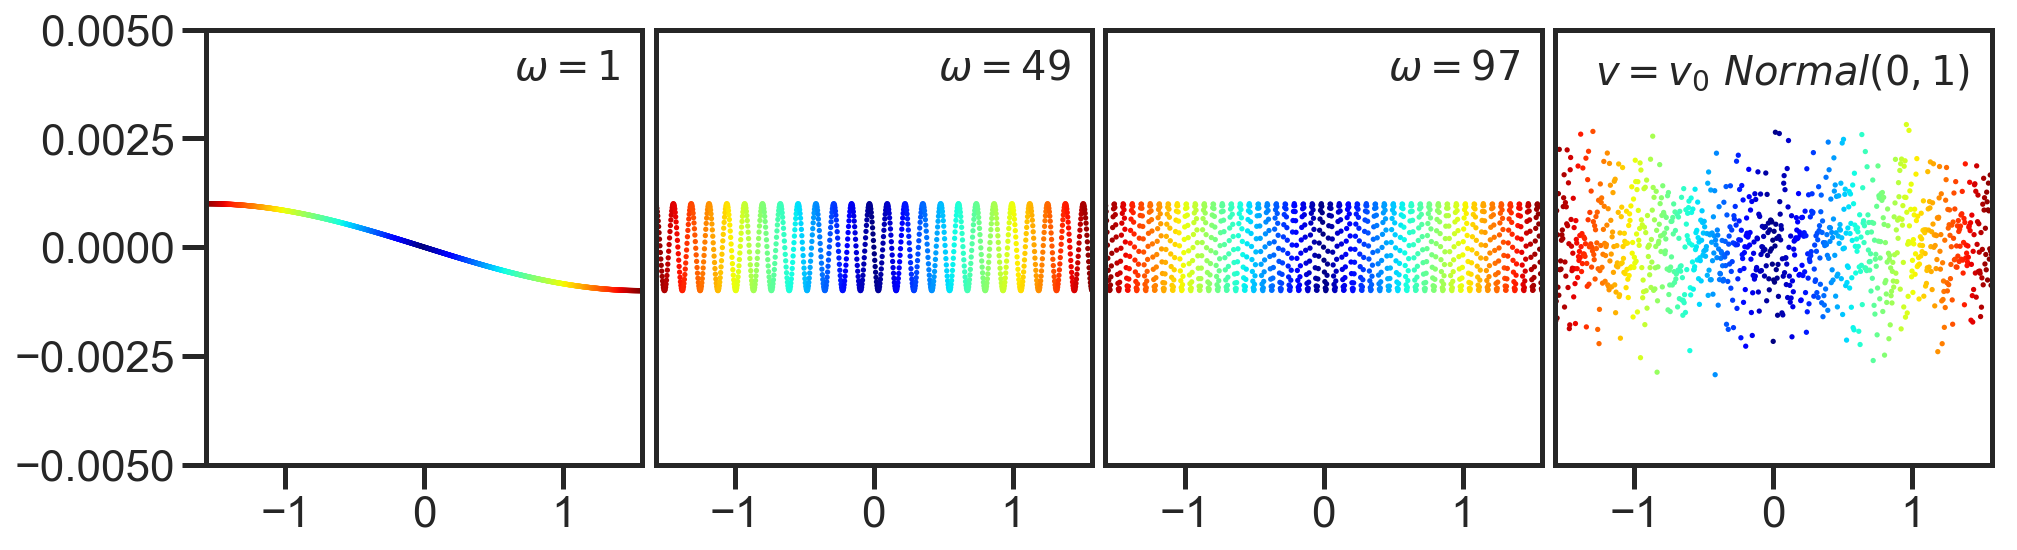

In [43]:
v_arr = [v1, v49, v97, vr]
w = [1, 49, 97]
plot_ics(v_arr, w)